In [2]:
import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys
from file_tools import *

In [20]:
arw_dir   = '/Users/Louis.Wicker/04May2021_HRRR'
arw_files = sorted(glob.glob(arw_dir+'/region.*.nc4'))

#ds_WRF = xr.open_mfdataset(arw_files, concat_dim=['lats','lons','plevels'])

ds_WRF = []

for file in arw_files:

    ds = xr.open_dataset(file)
    print(f'Successfully created dataframe for file:  {file}','\n')


    ds_WRF.append(ds)

print(ds_WRF)

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf18.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf19.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf20.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf21.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf22.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf23.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf24.nc4 

[<xarray.Dataset>
Dimensions:  (nx: 523, ny: 434, nz: 45)
Coordinates:
    lats     (ny, nx) float32 ...
    lons     (ny, nx

In [21]:
fv3_dir   = '/Users/Louis.Wicker/04May2021_RRFS/mem1'
fv3_files = sorted(glob.glob(fv3_dir+'/region.*.nc4'))
ds_FV3 = []

for file in fv3_files:
    
    ds_FV3.append(xr.open_dataset(file))
    print(f'Successfully created dataframe for file:  {file}\n')

print(ds_FV3)

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf018.nc4

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf019.nc4

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf020.nc4

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf021.nc4

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf022.nc4

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf023.nc4

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf024.nc4

[<xarray.Dataset>
Dimensions:  (nx: 641, ny: 556, nz: 45)
Coordinates:
    lats     (ny, nx) float32 ...
    lons     (ny, nx) float32 ...
    pres     (nz) float64 ...
Dimensions without coordinates: nx, ny, nz
Data

/Users/Louis.Wicker/miniconda3/envs/main/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/Louis.Wicker/miniconda3/envs/main/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/Louis.Wicker/miniconda3/envs/main/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/Louis.Wicker/miniconda3/envs/main/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/Louis.Wicker/miniconda3/envs/main/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/Louis.Wicker/miniconda3/envs/main/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom

Text(0.5, 1.0, 'Average WRF and FV3 regional Udraft profiles')

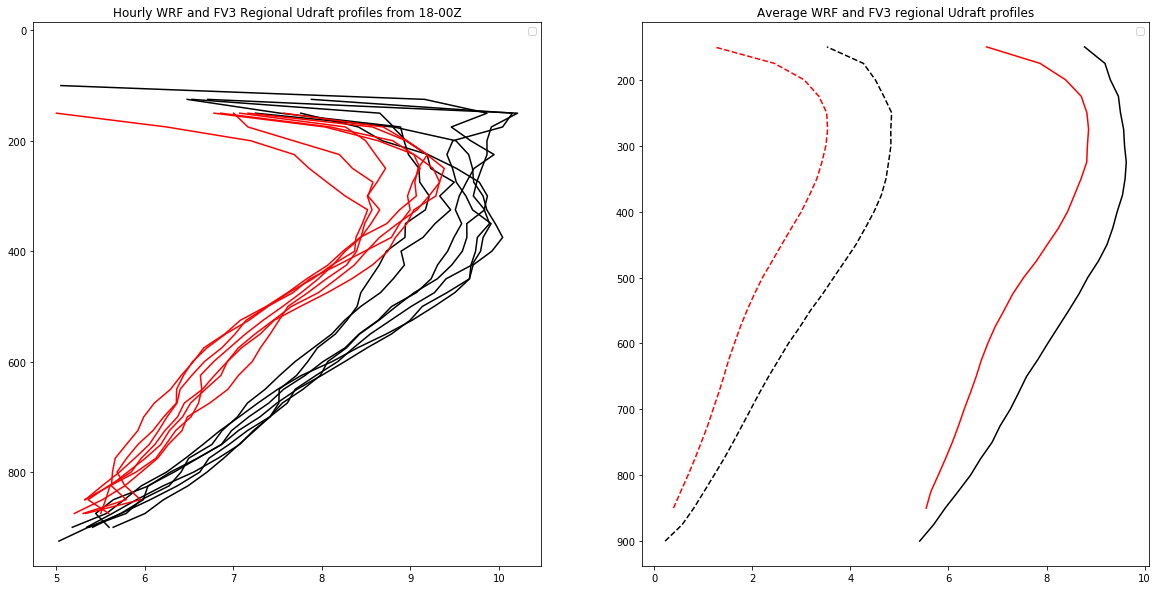

In [34]:
figsize = (20,10)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = figsize)

_w_threshold = 5.0

wrf_mean = np.zeros((7,45))
wrf_std  = np.zeros((7,45))
fv3_mean = np.zeros((7,45))
fv3_std  = np.zeros((7,45))

for n, item in enumerate(ds_WRF):
    dsW_WRF = item.where( item["W"] > _w_threshold )
    dsWmean_WRF = dsW_WRF.W.mean(dim=("ny","nx"), skipna=True, keep_attrs=False)
    dsWstd_WRF  = dsW_WRF.W.std(dim=("ny","nx"), skipna=True, keep_attrs=False)

    ax1.plot(dsWmean_WRF.values, plevels/100., color='black')
    wrf_mean[n,:] = dsWmean_WRF.values
    wrf_std[n,:]  = dsWstd_WRF.values

for n, item in enumerate(ds_FV3):    
    dsW_FV3 = item.where( item.W > _w_threshold )
    dsWmean_FV3 = dsW_FV3.W.mean(dim=("ny","nx"), skipna=True, keep_attrs=False)
    dsWstd_FV3  = dsW_FV3.W.std(dim=("ny","nx"), skipna=True, keep_attrs=False)

    ax1.plot(dsWmean_FV3.values, plevels/100., color='red')
    fv3_mean[n,:] = dsWmean_FV3.values
    fv3_std[n,:] = dsWstd_FV3.values
    
ax1.invert_yaxis()
ax2.invert_yaxis()

ax2.plot(wrf_mean.mean(axis=0), plevels/100., color='black')
ax2.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
ax2.plot(wrf_std.mean(axis=0), plevels/100., color='black',linestyle='dashed')
ax2.plot(fv3_mean.mean(axis=0), plevels/100., color='red')
ax2.plot(fv3_std.mean(axis=0), plevels/100., color='red', linestyle='dashed')
ax1.legend()
ax2.legend()
ax1.set_title("Hourly WRF and FV3 Regional Udraft profiles from 18-00Z")
ax2.set_title("Average WRF and FV3 regional Udraft profiles")


In [ ]:
from kde import *
